In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table
import galhalo
from jsm_datareduc import prep_data
from jsm_massfunc import SHMF, CSMF, scatter_stat, CSMF_old
import os
import anaclass

In [53]:
massmat = anaclass.MassMat("../../data/12_4_0/acc_surv_mass.npy")
massmat.prep_data(redfile="../../data/12_4_0/acc_surv_redshift.npy")

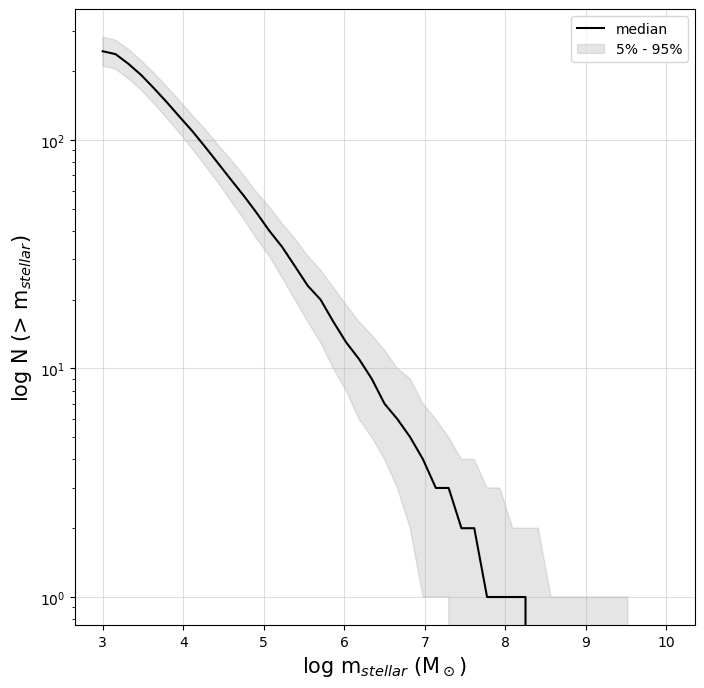

In [54]:
massmat.CSMF()

massmat.plot_CSMF()

In [55]:
B13_Ms, RP17_Ms = galhalo.lgMs_B13(massmat.lgMh, massmat.z), galhalo.lgMs_RP17(massmat.lgMh, massmat.z)

CSMF_B = CSMF(B13_Ms, massmat.mass_bins)

CSMF_RP = CSMF(RP17_Ms, massmat.mass_bins)

/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:170: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\
/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:224: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\


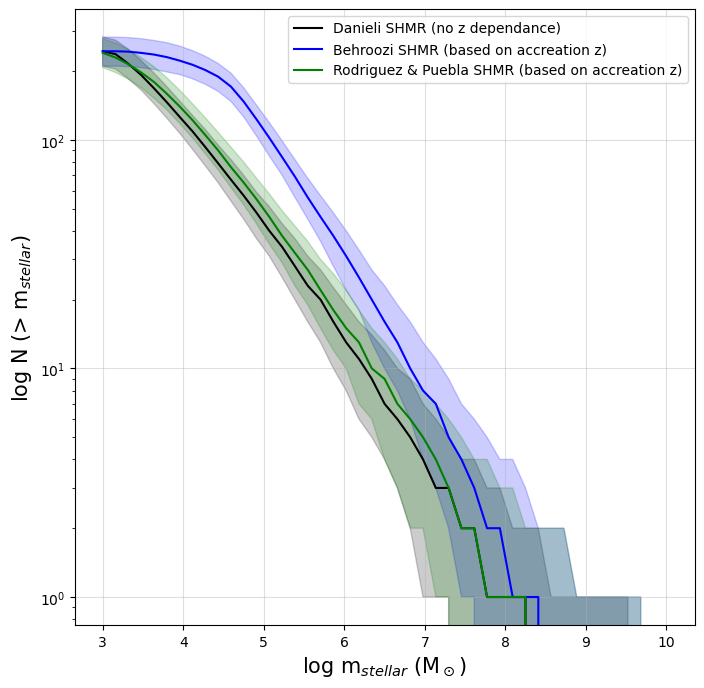

In [56]:
plt.figure(figsize=(8, 8))

plt.plot(massmat.mass_bins, massmat.quant[1], label="Danieli SHMR (no z dependance)", color="black")
plt.fill_between(massmat.mass_bins, y1=massmat.quant[0], y2=massmat.quant[2], alpha=0.2, color="black")

plt.plot(massmat.mass_bins, CSMF_B[1, :], label="Behroozi SHMR (based on accreation z)", color="blue")
plt.fill_between(massmat.mass_bins, y1=CSMF_B[0, :], y2=CSMF_B[2, :], alpha=0.2, color="blue")

plt.plot(massmat.mass_bins, CSMF_RP[1, :], label="Rodriguez & Puebla SHMR (based on accreation z)", color="green")
plt.fill_between(massmat.mass_bins, y1=CSMF_RP[0, :], y2=CSMF_RP[2, :], alpha=0.2, color="green")


plt.grid(alpha=0.4)
plt.yscale("log")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend()
plt.show()

In [57]:
pix = 10
gammas = np.round(np.linspace(0, 0.3, pix),3)

In [58]:
norm = mpl.colors.Normalize(vmin=gammas.min(), vmax=gammas.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis)

colors = mpl.cm.viridis(np.linspace(0, 1, pix))

halo_mass = massmat.lgMh[0]
red = massmat.z[0]

stellar_masses_RP = galhalo.lgMs_RP17(halo_mass, red)
stellar_masses_B = galhalo.lgMs_B13(halo_mass, red)

/var/folders/wm/2wnpbn757m34vprj1hp7hwzw0000gn/T/ipykernel_20448/1521124370.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cmap, label="z dependance on slope")


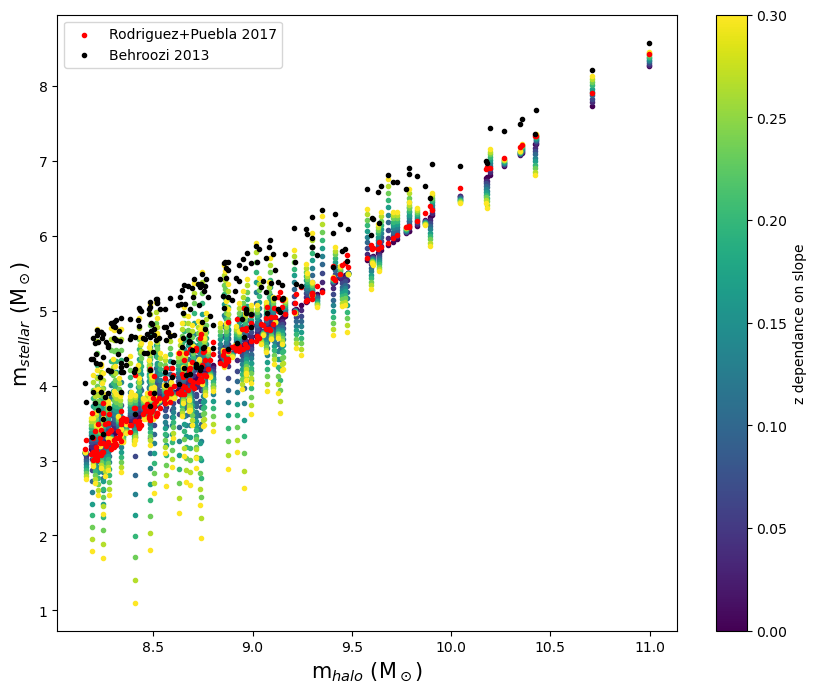

In [59]:
plt.figure(figsize=(10, 8))

for i in range(pix):
    
    lgMs = galhalo.lgMs_D22_red(halo_mass, red, gamma=gammas[i])

    plt.scatter(halo_mass, lgMs, color=colors[i], marker=".") # only one realization


plt.scatter(halo_mass, stellar_masses_RP, label="Rodriguez+Puebla 2017", color="red", marker=".")
plt.scatter(halo_mass, stellar_masses_B, label="Behroozi 2013", color="black", marker=".")

plt.colorbar(cmap, label="z dependance on slope")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend(fontsize=10)
plt.show()

In [60]:
pix = 10
gammas = np.round(np.linspace(0, 1, pix),3)

norm = mpl.colors.Normalize(vmin=gammas.min(), vmax=gammas.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis)

colors = mpl.cm.viridis(np.linspace(0, 1, pix))

/var/folders/wm/2wnpbn757m34vprj1hp7hwzw0000gn/T/ipykernel_20448/4241344510.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cmap, label="z dependance on intercept")


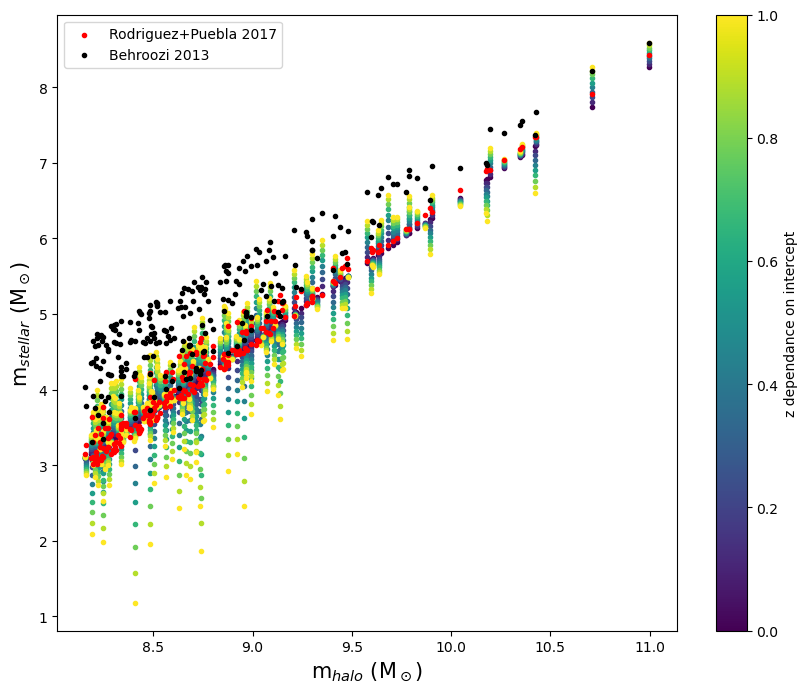

In [61]:
plt.figure(figsize=(10, 8))

for i in range(pix):
    
    lgMs = galhalo.lgMs_D22_red(halo_mass, red, gamma=gammas[i], var="int")

    plt.scatter(halo_mass, lgMs, color=colors[i], marker=".") # only one realization


plt.scatter(halo_mass, stellar_masses_RP, label="Rodriguez+Puebla 2017", color="red", marker=".")
plt.scatter(halo_mass, stellar_masses_B, label="Behroozi 2013", color="black", marker=".")

plt.colorbar(cmap, label="z dependance on intercept")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend(fontsize=10)
plt.show()

### lets just see what changing alpha does on its own

In [64]:
pix=20
alpha = np.linspace(1.5, 2.7, pix)
mat = np.zeros(shape=(pix, 3, 45))

massmat = anaclass.MassMat("../../data/12_4_0/acc_surv_mass.npy")


In [65]:

for i,val in enumerate(alpha):
    massmat.prep_data(a=val)
    massmat.CSMF()
    mat[i] = massmat.quant 


In [69]:
norm = mpl.colors.Normalize(vmin=alpha.min(), vmax=alpha.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.cividis)

colors = mpl.cm.cividis(np.linspace(0, 1, pix))

/var/folders/wm/2wnpbn757m34vprj1hp7hwzw0000gn/T/ipykernel_20448/1626304898.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cmap, label="α")


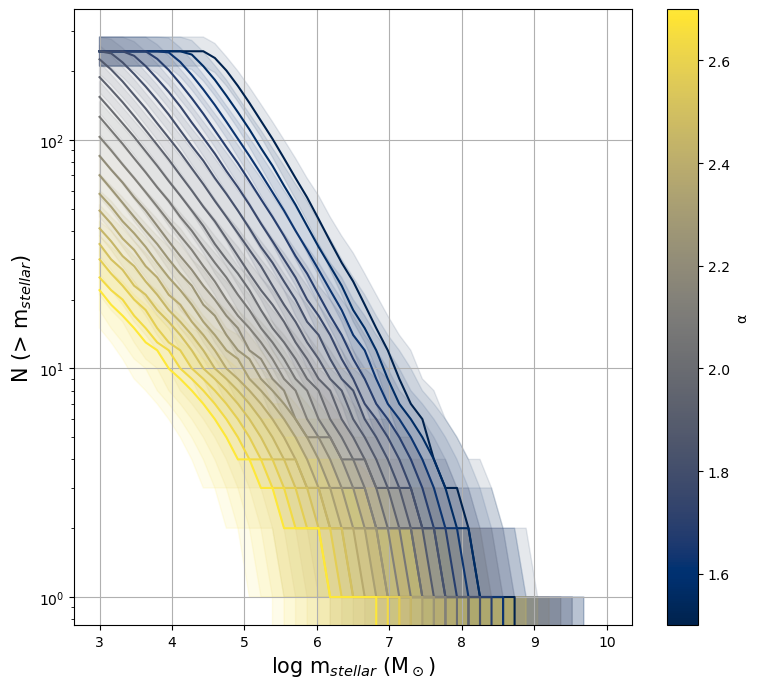

In [70]:

plt.figure(figsize=(9, 8)) # now plotting the color-coded CSMF!!

for i in range(pix):
    plt.plot(massmat.mass_bins, mat[i][1], color=colors[i])
    plt.fill_between(massmat.mass_bins, y1 = mat[i][0], y2=mat[i][2], color=colors[i], alpha=0.1)


plt.yscale("log")
plt.grid()
plt.colorbar(cmap, label="α")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
#plt.ylim(0.8)
plt.show()

In [71]:
mass_range = massmat.mass_bins

In [72]:
mass_ind = [16,22,28]
masses = np.round(mass_range[mass_ind],1)
colorsx = ["red", "orange", "green"]


/var/folders/wm/2wnpbn757m34vprj1hp7hwzw0000gn/T/ipykernel_20448/2907226798.py:18: RuntimeWarning: invalid value encountered in divide
  axs[1].fill_between(alpha, y1 = mat[:, 0, val]/mat[:, 1, val], y2=mat[:, 2, val]/mat[:, 1, val], label="log Ms~"+str(masses[i]), color=colorsx[i], alpha=0.2)
/var/folders/wm/2wnpbn757m34vprj1hp7hwzw0000gn/T/ipykernel_20448/2907226798.py:18: RuntimeWarning: divide by zero encountered in divide
  axs[1].fill_between(alpha, y1 = mat[:, 0, val]/mat[:, 1, val], y2=mat[:, 2, val]/mat[:, 1, val], label="log Ms~"+str(masses[i]), color=colorsx[i], alpha=0.2)


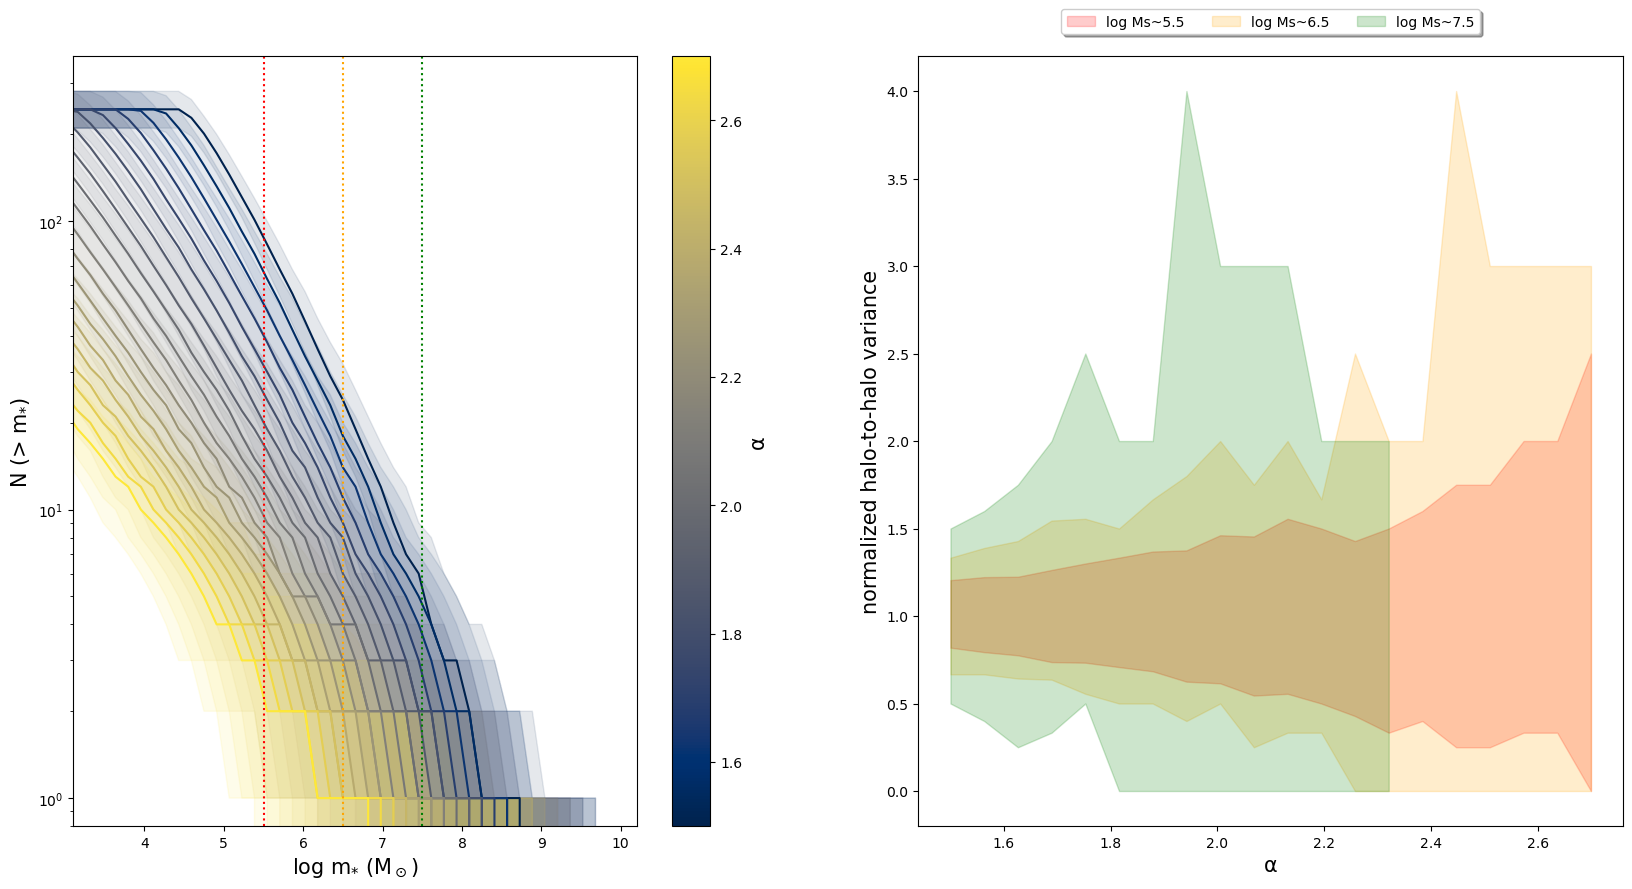

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(20,10), sharey=False)

for i in range(pix):
    axs[0].plot(massmat.mass_bins, mat[i][1], color=colors[i])
    axs[0].fill_between(massmat.mass_bins, y1 = mat[i][0], y2=mat[i][2], color=colors[i], alpha=0.1)

cb = fig.colorbar(cmap, ax=axs[0])
cb.set_label(label='α', fontsize=15)

axs[0].set_xlabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
axs[0].set_ylabel("N (> m$_{*}$)", fontsize=15)
axs[0].set_yscale("log")
axs[0].set_ylim(0.8)
axs[0].set_xlim(3.1,10.2)


for i,val in enumerate(mass_ind):
    axs[1].fill_between(alpha, y1 = mat[:, 0, val]/mat[:, 1, val], y2=mat[:, 2, val]/mat[:, 1, val], label="log Ms~"+str(masses[i]), color=colorsx[i], alpha=0.2)
    #axs[1].axhspan(CSMF_mat[0, val], CSMF_mat[2, val], 0, 2, label="log Ms~"+str(masses[i]), color=colorsx[i], alpha=0.1)
    #axs[1].axhline(CSMF_mat[0, val], ls=":", color=colorsx[i])
    #axs[1].axhline(CSMF_mat[2, val], ls=":", color=colorsx[i])
    axs[0].axvline(masses[i], color=colorsx[i], ls=":")

axs[1].set_xlabel("α", fontsize=15)
axs[1].set_ylabel("normalized halo-to-halo variance", fontsize=15)
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=5, fancybox=True, shadow=True)

plt.show()